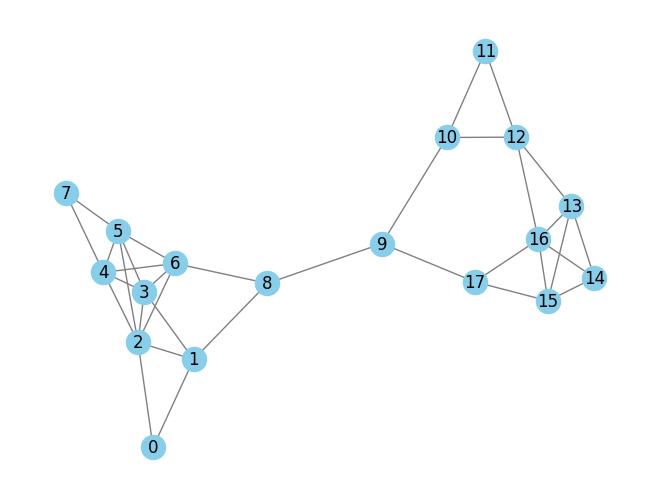

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Open the text file
file_path = 'graphs.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Create a new graph
G = nx.Graph()

# Add edges from the file to the graph
for line in lines:
    # Assuming each line contains two integers separated by whitespace
    parts = line.strip().split()
    if len(parts) == 2:
        u, v = map(int, parts)
        G.add_edge(u, v)

#pos = nx.spring_layout(G, seed=99, iterations=200)

# Draw the graph
nx.draw(G, with_labels=True, node_color='skyblue', node_size=300, edge_color='gray')

# Show the plot
plt.show()


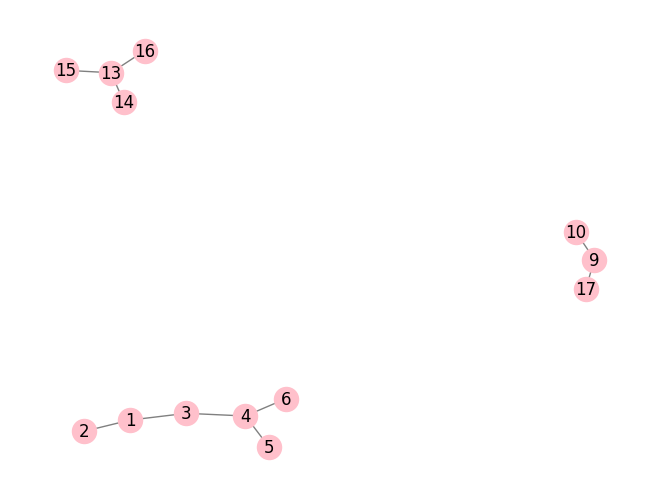

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


# Open the text file
file_path = 'edges_to_insert.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Create a new graph
G = nx.Graph()

# Add edges from the file to the graph
for line in lines:
    # Assuming each line contains two integers separated by whitespace
    parts = line.strip().split()
    if len(parts) == 2:
        u, v = map(int, parts)
        if G.has_edge(v, u):
          G.remove_edge(v, u)
        G.add_edge(u, v)


# Draw the graph
nx.draw(G, with_labels=True, node_color='pink', node_size=300, edge_color='gray')

# Show the plot
plt.show()


{(3, 4), (12, 16), (4, 6), (12, 13), (5, 7), (0, 2), (8, 9), (8, 6), (17, 15), (9, 17), (2, 5), (1, 3), (10, 12), (16, 14), (13, 14), (4, 5), (5, 6), (3, 6), (14, 15), (0, 1), (9, 10), (2, 4), (1, 2), (10, 11), (1, 8), (13, 16), (16, 15), (4, 7), (3, 5), (17, 16), (2, 3), (11, 12), (2, 6), (13, 15)}
[(1, 2), (1, 3), (4, 3), (4, 5), (4, 6), (9, 17), (10, 9), (13, 14), (13, 15), (13, 16)]


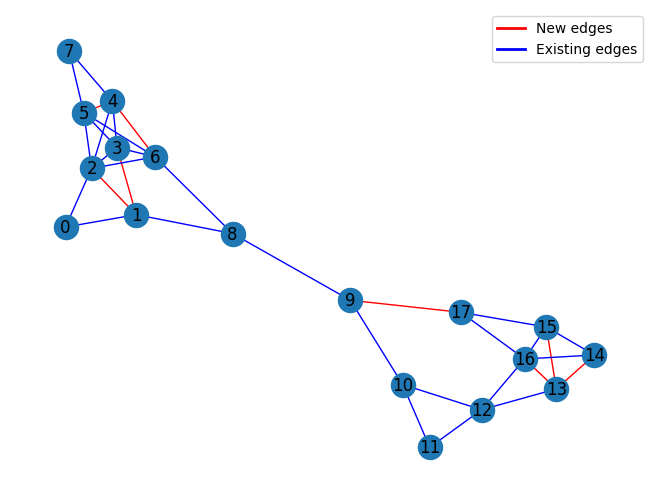

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Read edges from the file and add them to the graph
with open('graphs.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parts = line.strip().split()
        if len(parts) == 2:
            u, v = map(int, parts)
            G.add_edge(u, v)

# Define edge colors (blue for existing edges, red for new edges)
existing_edges = set(G.edges())
print(existing_edges)
new_edges=[]
# Read new edges from the file and add them to the graph
with open('edges_to_insert.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parts = line.strip().split()
        if len(parts) == 2:
            u, v = map(int, parts)
            new_edges.append((u,v))

print(new_edges)
for edge in new_edges:
    u, v = edge
    G.add_edge(u, v)
edge_colors = ['red' if edge in new_edges else 'blue' for edge in G.edges()]

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, edge_color=edge_colors)

# Draw legend
red_patch = plt.Line2D([0], [0], color='red', lw=2, label='New edges')
blue_patch = plt.Line2D([0], [0], color='blue', lw=2, label='Existing edges')
plt.legend(handles=[red_patch, blue_patch])

# Show the plot
plt.show()

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt

def read_file_and_extract_values(input_filename):
    extracted_values = []
    try:
        with open(input_filename, 'r') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) >= 2:
                    value1 = int(parts[0])
                    value2 = int(parts[1])
                    extracted_values.append((value1, value2))
    except FileNotFoundError:
        print(f"Error: File '{input_filename}' not found.")
    return extracted_values

def write_extracted_values_to_file(output_filename, extracted_values):
    #random.shuffle(extracted_values)
    try:
        with open(output_filename, 'w') as outfile:
            for value1, value2 in extracted_values:
                outfile.write(f"{value1}\t{value2}\n")
        print(f"Extracted values written to '{output_filename}'.")
    except IOError:
        print(f"Error: Unable to write to '{output_filename}'.")

def create_and_draw_graph(extracted_values):
    # Create a new graph
    G = nx.Graph()

    # Add edges from the extracted values
    G.add_edges_from(extracted_values)
   # Calculate layout using spring layout
    pos = nx.spring_layout(G, seed=400)  # seed for reproducibility

    # Draw the graph with custom layout
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos=pos, with_labels=True, node_color='skyblue', edge_color='gray', font_size=10, node_size=400, linewidths=1)
    plt.title("Knowledge Graph")
    plt.show()

In [ ]:
input_filename = 'triples.txt'
output_filename = 'graph_shuffled.txt'
extracted_values = read_file_and_extract_values(input_filename)
write_extracted_values_to_file(output_filename, extracted_values)

Extracted values written to 'graph_shuffled.txt'.


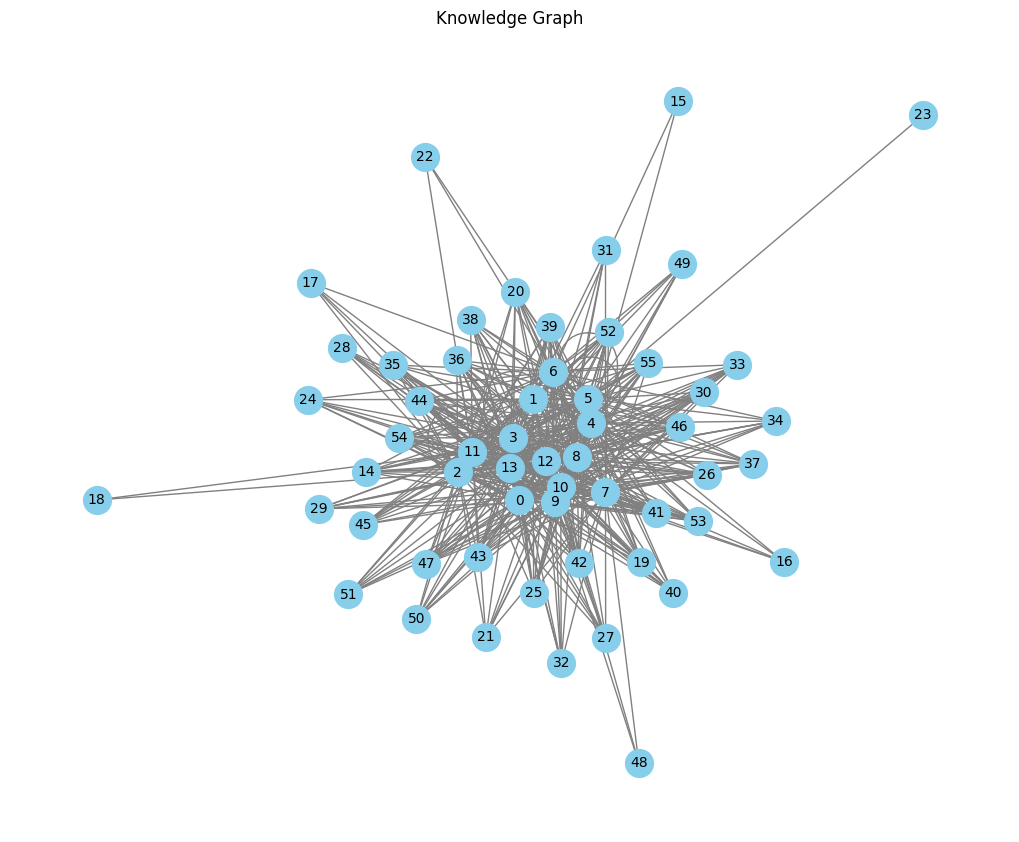

In [ ]:

create_and_draw_graph(extracted_values)